<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Age_Detection_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*https://www.analyticsvidhya.com/blog/2017/06/hands-on-with-deep-learning-solution-for-age-detection-practice-problem/*

In [0]:
import os
!mkdir age_detection

In [10]:
from google.colab import files
uploaded = files.upload()

Saving test_Bh8pGW3.zip to test_Bh8pGW3.zip


In [11]:
!unzip test_Bh8pGW3.zip
#!unzip train_DETg9GD.zip
#!mv Train age_detection
!mv Test age_detection
#!mv train.csv age_detection
!mv test.csv age_detection


Archive:  test_Bh8pGW3.zip
   creating: Test/
  inflating: test.csv                
  inflating: Test/10.jpg             
  inflating: Test/1000.jpg           
  inflating: Test/10002.jpg          
  inflating: Test/10003.jpg          
  inflating: Test/10005.jpg          
  inflating: Test/10006.jpg          
  inflating: Test/1001.jpg           
  inflating: Test/10010.jpg          
  inflating: Test/10012.jpg          
  inflating: Test/10014.jpg          
  inflating: Test/10020.jpg          
  inflating: Test/10022.jpg          
  inflating: Test/10024.jpg          
  inflating: Test/10029.jpg          
  inflating: Test/10032.jpg          
  inflating: Test/10033.jpg          
  inflating: Test/10037.jpg          
  inflating: Test/10039.jpg          
  inflating: Test/10042.jpg          
  inflating: Test/10044.jpg          
  inflating: Test/10049.jpg          
  inflating: Test/10052.jpg          
  inflating: Test/10054.jpg          
  inflating: Test/10060.jpg          
  in

# Problem Statement  
The task is to predict the age of a person from his or her facial attributes as Young, Middle and Old.

*Import Libraries*

In [0]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [0]:
Train_dir = 'age_detection/Train'
Test_dir = 'age_detection/Test'

In [0]:
import pandas as pd

In [0]:
train = pd.read_csv('age_detection/train.csv')
test = pd.read_csv('age_detection/test.csv')

In [17]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [18]:
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [57]:
train.shape

(19906, 3)

In [60]:
test.shape

(6636, 1)

In [65]:
lb = LabelEncoder()
Id_encode  = lb.fit_transform(train['Class'])
Id_encode

array([0, 2, 0, ..., 0, 0, 0])

In [0]:
train['Class_encode'] = Id_encode

In [67]:
train.Class.unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

In [68]:
train.Class_encode.unique()

array([0, 2, 1])

In [0]:
dict_map = {}
for i in range(len(train.Class.unique())):
  dict_map[train.Class_encode.unique()[i]] = train.Class.unique()[i]

In [70]:
dict_map

{0: 'MIDDLE', 1: 'OLD', 2: 'YOUNG'}

In [21]:
train.head()

,ID,Class,Class_encode
0,377.jpg,MIDDLE,0
1,17814.jpg,YOUNG,2
2,21283.jpg,MIDDLE,0
3,16496.jpg,YOUNG,2
4,4487.jpg,MIDDLE,0


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
%matplotlib inline

In [23]:
import os
os.listdir(Train_dir)[:5]

['5690.jpg', '15198.jpg', '14052.jpg', '25839.jpg', '23961.jpg']

In [0]:
dataset = []
label = []
images = train['ID'].values
classes = train['Class_encode'].values

In [0]:
for i, image_name in enumerate(images):
  if (image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(Train_dir+"/"+image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((64, 64))
    dataset.append(np.array(image))
    label.append(classes[i])

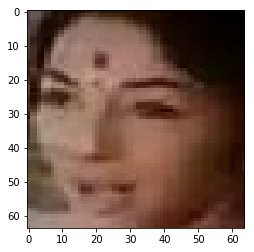

In [26]:
plt.imshow(dataset[10])

In [27]:
train['Class'].values[label[10]]

'MIDDLE'

In [28]:
dataset[0].shape

(64, 64, 3)

In [29]:
train_x = np.array(dataset)
train_x.shape

(19906, 64, 64, 3)

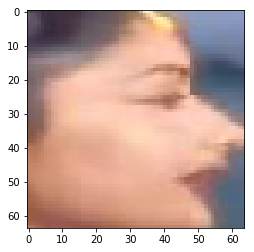

In [30]:
plt.imshow(dataset[20])

In [31]:
train['Class'].values[label[20]]

'MIDDLE'

**Convert the class labels into categorical values using Keras Utils**

In [0]:
labels = keras.utils.np_utils.to_categorical(Id_encode)

In [33]:
labels

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
epochs = 100
batch_size = 128

In [47]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import SGD

# number of possible label values
nb_classes = 3

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(50,(3,3), padding='same', input_shape=(64, 64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model.add(Conv2D(50,(5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# 3rd Convolution layer
model.add(Conv2D(100,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(nb_classes, activation='softmax'))

opt = SGD(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 50)        1400      
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 50)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 50)        62550     
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 50)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 100)       45100     
__________

In [48]:
history = model.fit(train_x, labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/100
15924/15924 [==============================] - 9s 563us/step - loss: 1.2654 - acc: 0.3764 - val_loss: 1.1170 - val_acc: 0.4591
Epoch 2/100
15924/15924 [==============================] - 8s 513us/step - loss: 1.1555 - acc: 0.4186 - val_loss: 1.0739 - val_acc: 0.4824
Epoch 3/100
15924/15924 [==============================] - 8s 511us/step - loss: 1.0946 - acc: 0.4586 - val_loss: 1.0471 - val_acc: 0.5033
Epoch 4/100
15924/15924 [==============================] - 8s 511us/step - loss: 1.0516 - acc: 0.4864 - val_loss: 1.0325 - val_acc: 0.5035
Epoch 5/100
15924/15924 [==============================] - 8s 510us/step - loss: 1.0189 - acc: 0.5133 - val_loss: 1.0081 - val_acc: 0.5234
Epoch 6/100
15924/15924 [==============================] - 8s 511us/step - loss: 0.9904 - acc: 0.5313 - val_loss: 0.9769 - val_acc: 0.5394
Epoch 7/100
15924/15924 [==============================] - 8s 510us/step - loss: 0.9673 - acc: 0.5479 - val_loss: 0.9

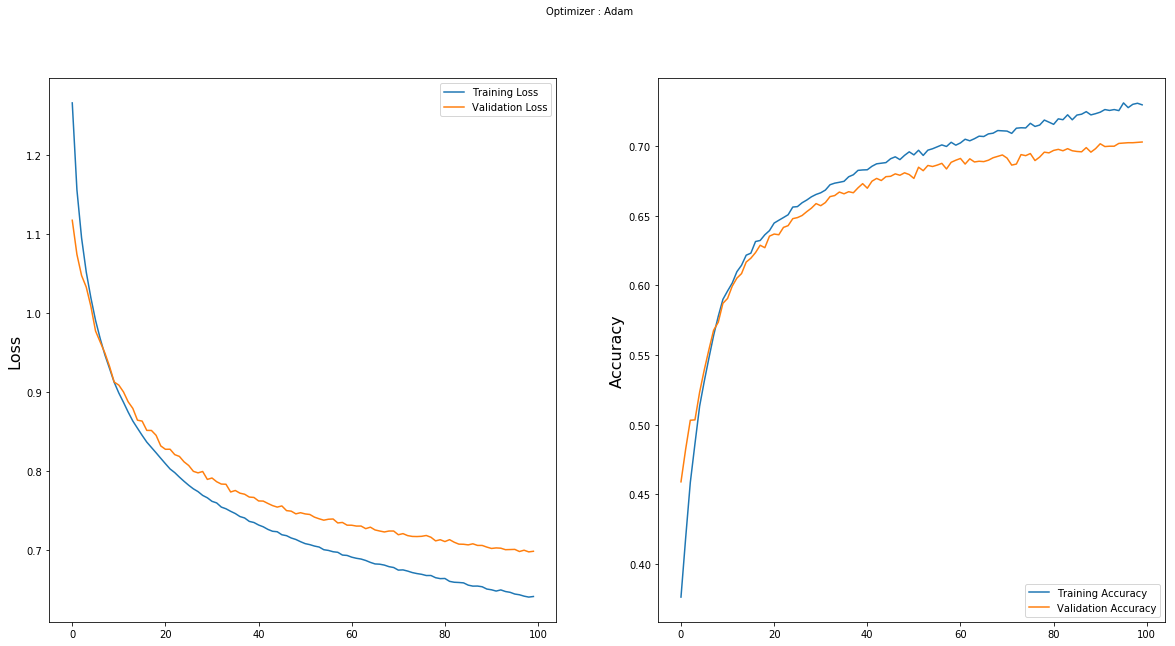

In [49]:
# plot the evolution of the loss and accuracy on both the train and validation datasets:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**Make predictions on test data**

In [0]:
test_data = []
test_images = test['ID'].values


In [0]:
for i, image_name in enumerate(test_images):
  if (image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(Test_dir+"/"+image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((64, 64))
    test_data.append(np.array(image))
    

In [79]:
test_img = np.array(test_data)
test_img.shape

(6636, 64, 64, 3)

In [0]:
preds = model.predict(test)

In [61]:
preds

array([[0.5606321 , 0.06427626, 0.37509158],
       [0.07589875, 0.01992963, 0.90417165],
       [0.6547291 , 0.19799656, 0.14727433],
       ...,
       [0.60656834, 0.20719118, 0.18624054],
       [0.78591055, 0.12077849, 0.09331089],
       [0.5915146 , 0.15647404, 0.2520114 ]], dtype=float32)

In [0]:
pred_labels = []

for i in preds:
  pred_labels.append(np.argmax(i))

In [0]:
test['pred_Class'] = pred_labels

In [72]:
test.head()

,ID,pred_Class
0,25321.jpg,0
1,989.jpg,2
2,19277.jpg,0
3,13093.jpg,0
4,5367.jpg,0


In [0]:
test['Class'] = test['pred_Class'].map(dict_map)

In [77]:
test.head()

,ID,pred_Class,Class
0,25321.jpg,0,MIDDLE
1,989.jpg,2,YOUNG
2,19277.jpg,0,MIDDLE
3,13093.jpg,0,MIDDLE
4,5367.jpg,0,MIDDLE


**Testing the predictions by ploting the images**

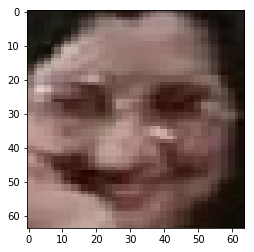

In [80]:
plt.imshow(test_img[0])

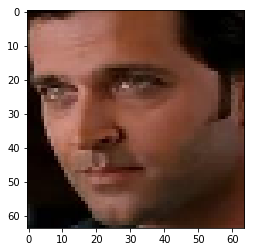

In [81]:
plt.imshow(test_img[1])

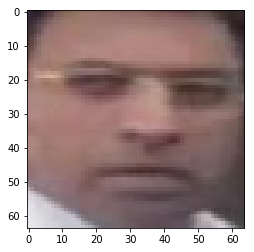

In [82]:
plt.imshow(test_img[2])

In [84]:
test[test['Class'] == 'OLD'].head(2)

,ID,pred_Class,Class
24,16784.jpg,1,OLD
55,22686.jpg,1,OLD


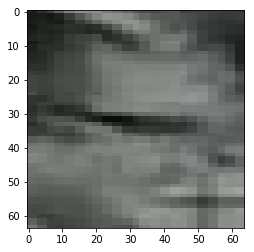

In [85]:
plt.imshow(test_img[24])

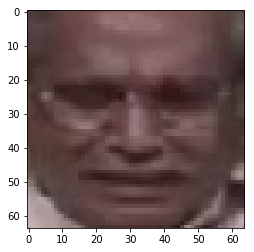

In [86]:
plt.imshow(test_img[55])